# Uniform flow and Non-uniformflow Calculation
## Simple Cross-Section version

In [4]:
#必要なライブラリをインポートしておく
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

In [5]:
#物理定数
g = 9.81

#分割数・断面間距離[m]
imax = 101
xmax = 5000
dx = xmax/(imax-1)

#勾配・川幅
slope0 = 1/1000
w0 = 200.
n0 = 0.02

#流量[m3/s]
q_up = 2000.

#下流端水位[m]
wl_dw = 5.0

# 格子分割

---

In [6]:
x = np.linspace(0,xmax, imax)

# 地形設定

---


In [8]:
#河床高
z0 = slope0 * x

n1 = int(0.4*imax)
n2 = int(0.5*imax)

z0[n1:n2] = z0[n1:n2]+0.5

# 等流計算

---

In [9]:
#等流水深
h0 =(n0 * q_up/(w0 * np.sqrt(slope0)))**(3/5)

#流速
v0 = q_up/(h0*w0)

print("Discharge =" + str(q_up), "[m3/s]")
print("Slope =" + str(slope0))
print("Width =" + str(w0), "[m]")
print("h0 =" + str(h0), "[m]")
print("v0 =" + str(v0), "[m/s]")


#水位
wl0 = h0 + z0

Discharge =2000.0 [m3/s]
Slope =0.001
Width =200.0 [m]
h0 =3.0242521453322184 [m]
v0 =3.306602597747843 [m/s]


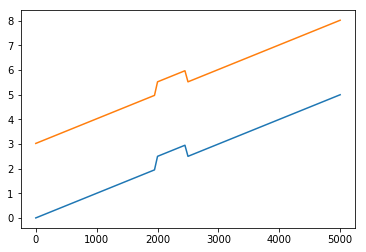

In [10]:
plt.plot(x,z0)
plt.plot(x,wl0)

---


# 不等流計算１　→　wl1
## 川幅：一定、勾配：一定、粗度：一定

---

In [11]:
#水位配列の設定、下流端水位設定
wl1 = np.zeros(imax)
wl1[0] = wl_dw

In [12]:
#　不等流計算関数
def func_f1(h1, h2, z1, z2, q, w, n, dx):
    aa = q**2/(2*g*w**2)
    bb = - n**2*q**2.*dx/(2*w**2)
    cc = z1 - (z2 + h2 + aa/h2**2 - bb/h2**(10/3)) 
    return h1 + aa/h1**2 + bb/h1**(10/3) +cc

In [13]:
#Newton法による水位計算
hh2 = wl1[0] - z0[0] #下流と同じ水深を与える
for i in range(1, imax):
    zz1 = z0[i]; zz2 = z0[i-1]
    
    #上流側水深
    hh1 = scipy.optimize.newton(func_f1, hh2, args=(hh2, zz1, zz2, q_up, w0, n0, dx)) #,  maxiter=100,  tol=1.0e-06)
    
    #水位設定
    wl1[i] = hh1 +z0[i]
    
    #次断面計算用にhh2を更新
    hh2 = hh1
    

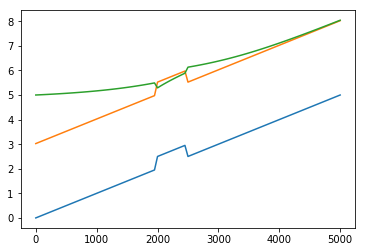

In [14]:
plt.plot(x,z0)
plt.plot(x,wl0)
plt.plot(x,wl1)


---

# 不等流計算２　→　wl2
## 川幅：変化、勾配：一定、粗度：一定

---


In [107]:
#水位配列の設定、下流端水位設定
wl2 = np.zeros(imax)
wl2[0] = wl_dw

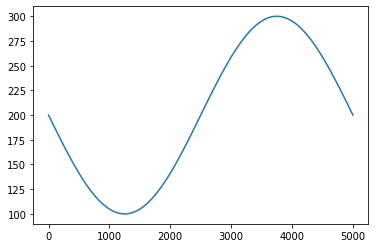

In [108]:
#川幅変化
w = np.ones(imax) * w0 + 100*np.sin(np.linspace(-np.pi, np.pi, imax))
plt.plot(x,w)

In [109]:
#Newton法による水位計算
hh2 = wl1[0] - z0[0] #下流と同じ水深を与える
for i in range(1, imax):
    zz1 = z0[i]; zz2 = z0[i-1]
    
    #上流側水深
    hh1 = scipy.optimize.newton(func_f1, hh2, args=(hh2, zz1, zz2, q_up, w[i], n0, dx)) #,  maxiter=100,  tol=1.0e-06)
    
    #水位設定
    wl2[i] = hh1 +z0[i]
    
    #次断面計算用にhh2を更新
    hh2 = hh1



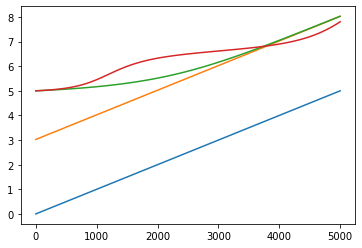

In [110]:
plt.plot(x,z0)
plt.plot(x,wl0)
plt.plot(x,wl1)
plt.plot(x,wl2)

---

# 不等流計算３　→　wl3
## 川幅：変化、勾配：変化、粗度：一定

---


In [111]:
#水位配列の設定、下流端水位設定
wl3 = np.zeros(imax)
wl3[0] = wl_dw

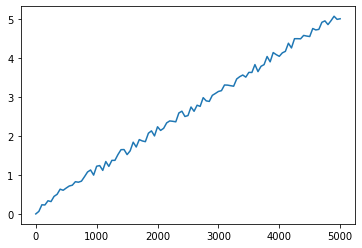

In [112]:
#局所勾配
z = z0
slope = slope0 * np.ones(imax-1) + np.random.rand(imax-1)/200
z[1:] = z0[0:-1] + slope[0:]*dx
plt.plot(x,z)

In [113]:
#Newton法による水位計算
hh2 = wl1[0] - z[0] #下流と同じ水深を与える
for i in range(1, imax):
    zz1 = z[i]; zz2 = z[i-1]
    
    #上流側水深
    hh1 = scipy.optimize.newton(func_f1, hh2, args=(hh2, zz1, zz2, q_up, w[i], n0, dx)) #,  maxiter=100,  tol=1.0e-06)
    #hh1 = scipy.optimize.newton(func_f1, hh2, args=(hh2, zz1, zz2, q_up, w0, n0, dx)) #,  maxiter=100,  tol=1.0e-06)
    
    #水位設定
    wl3[i] = hh1 +z[i]
    
    #次断面計算用にhh2を更新
    hh2 = hh1

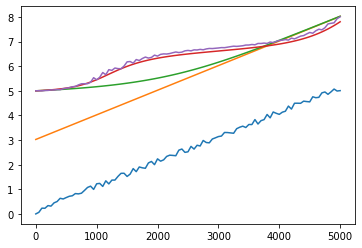

In [114]:
plt.plot(x,z)
plt.plot(x,wl0)
plt.plot(x,wl1)
plt.plot(x,wl2)
plt.plot(x,wl3)